from google.colab import drive
drive.mount('/content/drive')

In [163]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB :
    from google.colab import drive
    drive.mount('/content/drive')
    
if IN_COLAB :
  Dataset_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/"
else :
  Dataset_path = "./DataSets/"

ml_path = Dataset_path + "ml-latest/"

In [172]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import mean_squared_error,mean_absolute_error


In [222]:
Movies_metadata = pd.read_csv(Dataset_path+"MoviesInfo.csv")
ratings = pd.read_csv(ml_path+"ratings.csv")

In [223]:
Movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41896 entries, 0 to 41895
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                41896 non-null  int64  
 1   genres                 41896 non-null  object 
 2   imdb_title_id          41896 non-null  object 
 3   title                  41896 non-null  object 
 4   original_title         41896 non-null  object 
 5   year                   41896 non-null  int64  
 6   date_published         41896 non-null  object 
 7   genre                  41896 non-null  object 
 8   duration               41896 non-null  int64  
 9   country                41890 non-null  object 
 10  language               41648 non-null  object 
 11  director               41886 non-null  object 
 12  writer                 41621 non-null  object 
 13  production_company     40944 non-null  object 
 14  actors                 41877 non-null  object 
 15  de

In [224]:
Movies_metadata['mean_vote'].describe()

count    41896.000000
mean         6.379342
std          1.036597
min          1.300000
25%          5.800000
50%          6.500000
75%          7.100000
max          9.400000
Name: mean_vote, dtype: float64

In [225]:
Movies_metadata['language'] = Movies_metadata['language'].fillna('nolang')
freq = {}

for item in Movies_metadata['language']:
    for subitem in item.split(', '):
        if (subitem in freq):
            freq[subitem] += 1
        else:
            freq[subitem] = 1
    
for key, value in freq.items():
    print ("% s : % d"%(key, value))

English :  28413
French :  4639
Italian :  2891
German :  2352
Spanish :  2943
Russian :  1718
Mandarin :  910
Dutch :  410
Cantonese :  643
Latin :  322
Algonquin :  5
Hungarian :  211
Hebrew :  317
Korean :  636
American Sign Language :  60
Persian :  199
Danish :  284
Scottish Gaelic :  22
Hawaiian :  17
Japanese :  1967
Hindi :  898
Punjabi :  39
Urdu :  79
Sicilian :  10
Arabic :  483
Yiddish :  86
Serbo-Croatian :  70
Croatian :  43
Mongolian :  11
Romanian :  164
Malay :  19
Indonesian :  58
Finnish :  402
Luxembourgish :  7
French Sign Language :  7
Sioux :  13
Macedonian :  12
Albanian :  38
Swedish :  558
Cornish :  1
Vietnamese :  88
Swahili :  38
Navajo :  10
Maori :  18
Polish :  450
Norwegian :  214
Egyptian (Ancient) :  6
Klingon :  12
Filipino :  72
British Sign Language :  3
Xhosa :  21
Zulu :  26
Esperanto :  13
Irish :  42
Apache languages :  7
Welsh :  17
Chinese :  120
Neapolitan :  13
Pawnee :  2
Greek :  281
Catalan :  59
Czech :  205
Icelandic :  72
Afrikaans : 

In [226]:
mylang = ['English' , 'French' , 'Italian','German','Spanish','Russian', 'Other']
mylangs = ['English' , 'French' , 'Italian','German','Spanish','Russian']
for i in mylang:
    Movies_metadata[i] = 0
    
for index, row in Movies_metadata.iterrows():
#     print( index, row['imdb_title_id'], row['genres'])
    for subitem in row['language'].split(', '):
        if subitem in mylangs:
            Movies_metadata.loc[index, subitem] = 1
        else:
            Movies_metadata.loc[index, "Other"] = 1
        
Movies_metadata.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41896 entries, 0 to 41895
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                41896 non-null  int64  
 1   genres                 41896 non-null  object 
 2   imdb_title_id          41896 non-null  object 
 3   title                  41896 non-null  object 
 4   original_title         41896 non-null  object 
 5   year                   41896 non-null  int64  
 6   date_published         41896 non-null  object 
 7   genre                  41896 non-null  object 
 8   duration               41896 non-null  int64  
 9   country                41890 non-null  object 
 10  language               41896 non-null  object 
 11  director               41886 non-null  object 
 12  writer                 41621 non-null  object 
 13  production_company     40944 non-null  object 
 14  actors                 41877 non-null  object 
 15  de

In [227]:
#obj_Movies_metadata = Movies_metadata.select_dtypes(include=['object']).copy()
#myobj = ['country','language','production_company']

#for i in myobj:
 #   obj_Movies_metadata[i] = obj_Movies_metadata[i].astype('category')
  #  Movies_metadata[i] = obj_Movies_metadata[i].cat.codes


In [228]:
Movies_metadata = Movies_metadata.fillna(100000)
Movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41896 entries, 0 to 41895
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                41896 non-null  int64  
 1   genres                 41896 non-null  object 
 2   imdb_title_id          41896 non-null  object 
 3   title                  41896 non-null  object 
 4   original_title         41896 non-null  object 
 5   year                   41896 non-null  int64  
 6   date_published         41896 non-null  object 
 7   genre                  41896 non-null  object 
 8   duration               41896 non-null  int64  
 9   country                41896 non-null  object 
 10  language               41896 non-null  object 
 11  director               41896 non-null  object 
 12  writer                 41896 non-null  object 
 13  production_company     41896 non-null  object 
 14  actors                 41896 non-null  object 
 15  de

In [229]:
data =  Movies_metadata[['movieId','year','duration','metascore','reviews_from_users','reviews_from_critics',
                         'English' , 'French' , 'Italian','German','Spanish','Russian', 'Other','mean_vote'] ]

In [230]:
pd.options.mode.chained_assignment = None
all_genres = []

for item in Movies_metadata['genres']:
    for subitem in item.split('|'):
        if (subitem not in all_genres):
            all_genres.append( subitem )

            
for i in all_genres:
    data[i] = 0

for index, row in Movies_metadata.iterrows():
#     print( index, row['imdb_title_id'], row['genres'])
    for subitem in row['genres'].split('|'):
        data.loc[index, subitem] = 1

In [231]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(data.drop(['movieId','mean_vote'],axis=1))
data_norm = pd.DataFrame(scaled,columns=(data.drop(['movieId','mean_vote'],axis=1).columns))
data_norm= data_norm.join(data['mean_vote'])
data_norm= data_norm.join(data['movieId'])


from scipy import stats
z_scores = stats.zscore(data_norm.drop(['movieId','mean_vote'],axis=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
newdata = data_norm[filtered_entries]

newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20121 entries, 3 to 41893
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  20121 non-null  float64
 1   duration              20121 non-null  float64
 2   metascore             20121 non-null  float64
 3   reviews_from_users    20121 non-null  float64
 4   reviews_from_critics  20121 non-null  float64
 5   English               20121 non-null  float64
 6   French                20121 non-null  float64
 7   Italian               20121 non-null  float64
 8   German                20121 non-null  float64
 9   Spanish               20121 non-null  float64
 10  Russian               20121 non-null  float64
 11  Other                 20121 non-null  float64
 12  Adventure             20121 non-null  float64
 13  Animation             20121 non-null  float64
 14  Children              20121 non-null  float64
 15  Comedy             

In [232]:
pd.options.mode.chained_assignment = None

newdata['mean_vote_class'] = 0
newdata['mean_vote_class'][newdata['mean_vote']>=6.5] = 1
newdata['mean_vote_class'][newdata['mean_vote']<6.5] = 0

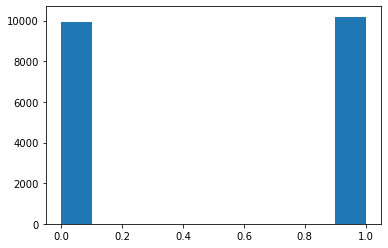

In [233]:
plt.hist(newdata['mean_vote_class'])
plt.show()

In [234]:
#from sklearn.decomposition import PCA
#pca01 = PCA(n_components = 4)
#principlecomp_train = pca01.fit_transform(newdata.drop(['movieId','mean_vote','mean_vote_class'],axis=1))
#pca01.explained_variance_ratio_

array([0.15229251, 0.14314207, 0.11157316, 0.10623405])

### Without Classing of mean_vote

In [235]:
target = newdata['mean_vote'] 
predictors = newdata.drop(['mean_vote','movieId','mean_vote_class'],axis=1)

In [236]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.30, random_state=40)

In [248]:
model01 = Sequential()
model01.add(Dense(900, activation='relu', input_dim=32))
model01.add(Dense(600, activation='relu'))
model01.add(Dense(300, activation='relu'))
model01.add(Dense(150, activation='relu'))
model01.add(Dense(30, activation='relu'))
model01.add(Dense(1, activation='linear'))

# Compile the model
model01.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])

In [249]:
model01.fit(X_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
1409/1409 [==============================] - 17s 10ms/step - loss: 0.7644 - mean_squared_error: 1.0654
Epoch 2/20
1409/1409 [==============================] - 14s 10ms/step - loss: 0.6844 - mean_squared_error: 0.7760
Epoch 3/20
1409/1409 [==============================] - 14s 10ms/step - loss: 0.6553 - mean_squared_error: 0.7236
Epoch 4/20
1409/1409 [==============================] - 14s 10ms/step - loss: 0.6504 - mean_squared_error: 0.7162
Epoch 5/20
1409/1409 [==============================] - 14s 10ms/step - loss: 0.6457 - mean_squared_error: 0.7038
Epoch 6/20
1409/1409 [==============================] - 14s 10ms/step - loss: 0.6335 - mean_squared_error: 0.6813
Epoch 7/20
1409/1409 [==============================] - 14s 10ms/step - loss: 0.6306 - mean_squared_error: 0.6782
Epoch 8/20
1409/1409 [==============================] - 14s 10ms/step - loss: 0.6234 - mean_squared_error: 0.6638
Epoch 9/20
1409/1409 [==============================] - 14s 10ms/step - loss: 0.6231 - m

In [250]:
y_pred= model01.predict(X_test)

In [251]:
scores = model01.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores[1], 1 - scores[1]))    

Accuracy on test data: 0.6186407804489136% 
 Error on test data: 0.3813592195510864


In [252]:
print('MSE:',mean_squared_error(y_test, y_pred))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

MSE: 0.6186408990693504
MAE: 0.6070167821429514
RMSE: 0.7865372839664693


### With Classing mean_vote

In [253]:
target = newdata['mean_vote_class'] 
predictors = newdata.drop(['mean_vote','mean_vote_class','movieId'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.30, random_state=40)


In [254]:
model02 = Sequential()
model02.add(Dense(300, activation='relu', input_dim=32))
model02.add(Dense(150, activation='relu'))
model02.add(Dense(30, activation='relu'))
model02.add(Dense(1, activation='sigmoid'))

# Compile the model
model02.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])

In [255]:
model02.fit(X_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
1409/1409 [==============================] - 5s 3ms/step - loss: 0.2971 - mean_squared_error: 0.2728
Epoch 2/20
1409/1409 [==============================] - 4s 3ms/step - loss: 0.2881 - mean_squared_error: 0.2800
Epoch 3/20
1409/1409 [==============================] - 4s 2ms/step - loss: 0.2836 - mean_squared_error: 0.2762
Epoch 4/20
1409/1409 [==============================] - 4s 3ms/step - loss: 0.2857 - mean_squared_error: 0.2820
Epoch 5/20
1409/1409 [==============================] - 3s 2ms/step - loss: 0.2824 - mean_squared_error: 0.2795
Epoch 6/20
1409/1409 [==============================] - 4s 2ms/step - loss: 0.2892 - mean_squared_error: 0.2871
Epoch 7/20
1409/1409 [==============================] - 4s 2ms/step - loss: 0.2889 - mean_squared_error: 0.2869
Epoch 8/20
1409/1409 [==============================] - 4s 3ms/step - loss: 0.2850 - mean_squared_error: 0.2833
Epoch 9/20
1409/1409 [==============================] - 4s 2ms/step - loss: 0.2858 - mean_squared_error:

In [256]:
y_pred = model02.predict(X_test)

In [257]:
scores = model02.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores[1], 1 - scores[1])) 

Accuracy on test data: 0.2705593407154083% 
 Error on test data: 0.7294406592845917


In [258]:
print('MSE:',mean_squared_error(y_test, y_pred))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

MSE: 0.2705592993331496
MAE: 0.2708082310366579
RMSE: 0.5201531498829451


### Generate Recommendation

In [261]:
import difflib
import random

def get_Movie_info(Movie_id):
    
    """
    Returns some basic information about a Movie given the Movie id and the metadata dataframe.
    """
    
    Movie_info = Movies_metadata[Movies_metadata['movieId'] == int(Movie_id)][['movieId', 'genres', 
                                                            'title', 'original_title', 'year', 'duration','mean_vote']]
    return Movie_info


def generate_recommendation(model,movieid):
    frames = pd.DataFrame()
    
    for i in movieid:
        mask = newdata[newdata.movieId.isin([i])]
        mask = mask.drop(['mean_vote','mean_vote_class','movieId'],axis=1)
        rating = model.predict(mask)
        tmp = get_Movie_info(i)
        tmp['pred_mean'] = rating
        frames = frames.append(tmp, ignore_index=True)

    return frames
#.sort_values('rating', ascending=False)

In [264]:
generate_recommendation(model01,[4,7,9,193843,193878])

,movieId,genres,title,original_title,year,duration,mean_vote,pred_mean
0,4,Comedy|Drama|Romance,Donne,Waiting to Exhale,1995,124,6.2,6.501406
1,7,Comedy|Romance,Sabrina,Sabrina,1995,127,6.5,6.683612
2,9,Action,A rischio della vita,Sudden Death,1995,111,5.9,5.290041
3,193843,Action|Drama|Thriller,Raazi,Raazi,2018,138,7.8,6.663864
4,193878,Comedy,Les tribulations d'une caissière,Les tribulations d'une caissière,2011,102,5.4,5.900451


In [265]:
generate_recommendation(model02,[4,7,9,193843,193878])

,movieId,genres,title,original_title,year,duration,mean_vote,pred_mean
0,4,Comedy|Drama|Romance,Donne,Waiting to Exhale,1995,124,6.2,1.0
1,7,Comedy|Romance,Sabrina,Sabrina,1995,127,6.5,1.0
2,9,Action,A rischio della vita,Sudden Death,1995,111,5.9,0.0
3,193843,Action|Drama|Thriller,Raazi,Raazi,2018,138,7.8,1.0
4,193878,Comedy,Les tribulations d'une caissière,Les tribulations d'une caissière,2011,102,5.4,0.0
